In [18]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import random
from sklearn.model_selection import train_test_split   

In [19]:
## dataset
data = [
    # Positive
    ("I love this movie, it was fantastic!", 1),
    ("Amazing plot and great performances!", 1),
    ("What a wonderful experience!", 1),
    ("Brilliant direction and strong cast.", 1),
    ("Absolutely loved it!", 1),
    ("A masterpiece of modern cinema.", 1),
    ("The visuals and story were breathtaking.", 1),
    ("Exceptional acting and brilliant screenplay.", 1),
    ("Truly inspiring and well-crafted.", 1),
    ("An emotional rollercoaster with a happy end.", 1),
    ("The movie exceeded my expectations.", 1),
    ("I enjoyed every minute of it.", 1),
    ("Heartwarming and deeply moving.", 1),
    ("A compelling story with great characters.", 1),
    ("The actors delivered fantastic performances.", 1),
    ("An unforgettable experience.", 1),
    ("The direction was top-notch.", 1),
    ("Highly entertaining and beautifully shot.", 1),
    ("Best movie I've seen this year!", 1),
    ("Wonderful execution and pacing.", 1),
    ("Left me speechless, in a good way.", 1),
    ("Incredible storytelling and visuals.", 1),
    ("Uplifting and inspiring movie.", 1),
    ("A joy to watch from start to finish.", 1),
    ("Loved the soundtrack and cinematography.", 1),
    ("Totally worth watching again!", 1),
    ("The dialogue was witty and smart.", 1),
    ("Very touching and well-acted.", 1),
    ("The characters felt very real and human.", 1),
    ("A fresh and original take on a familiar genre.", 1),
    ("The chemistry between the leads was amazing.", 1),
    ("Impressive production quality and plot depth.", 1),
    ("Simply stunning and emotionally satisfying.", 1),
    ("Loved the twists and turns.", 1),
    ("This film deserves all the praise.", 1),
    ("I was completely immersed.", 1),
    ("It was okay, not the best but enjoyable.", 1),
    ("Pleasantly surprised by how good it was.", 1),
    ("A solid movie night pick.", 1),
    ("Engaging and thoughtful throughout.", 1),
    ("I smiled through most of the film.", 1),
    ("Definitely recommend this movie.", 1),
    ("A positive and feel-good story.", 1),
    ("An all-time favorite!", 1),
    ("Five stars from me!", 1),
    ("A nice blend of humor and emotion.", 1),
    ("Very entertaining.", 1),
    ("One of the better films this year.", 1),
    ("Charming and full of heart.", 1),
    ("Didn't expect to love it this much.", 1),

    # Negative
    ("Absolutely terrible. Waste of time.", 0),
    ("Worst acting I have ever seen.", 0),
    ("I didn't like it at all.", 0),
    ("The film was boring and predictable.", 0),
    ("Horrible. I walked out halfway.", 0),
    ("A complete disaster from start to finish.", 0),
    ("Terribly written and poorly executed.", 0),
    ("The plot made no sense.", 0),
    ("A mess of clichés and bad dialogue.", 0),
    ("Not worth the hype.", 0),
    ("It was painful to sit through.", 0),
    ("The pacing was way off.", 0),
    ("Characters were flat and uninteresting.", 0),
    ("Too many plot holes to count.", 0),
    ("Acting was wooden and emotionless.", 0),
    ("An insult to the genre.", 0),
    ("Predictable and lazy writing.", 0),
    ("Music was distracting and out of place.", 0),
    ("Uninspired and forgettable.", 0),
    ("Dialogue felt forced and unnatural.", 0),
    ("It dragged on forever.", 0),
    ("Couldn’t connect with any character.", 0),
    ("The trailer was better than the movie.", 0),
    ("Disappointing and dull.", 0),
    ("Felt like a waste of money.", 0),
    ("The jokes were cringe-worthy.", 0),
    ("It lacked depth and originality.", 0),
    ("Too predictable and not funny.", 0),
    ("Very slow and uninteresting plot.", 0),
    ("Nothing happened for an hour.", 0),
    ("Really bad camera work and sound.", 0),
    ("The ending was abrupt and made no sense.", 0),
    ("Failed to deliver any emotion.", 0),
    ("Overacted and overhyped.", 0),
    ("Not even good for background noise.", 0),
    ("Terribly boring.", 0),
    ("I regret watching it.", 0),
    ("Very disappointing.", 0),
    ("One of the worst films I've seen.", 0),
    ("Unbelievably bad.", 0),
    ("A total flop.", 0),
    ("The cast seemed confused.", 0),
    ("The story didn’t go anywhere.", 0),
    ("I almost fell asleep.", 0),
    ("Nothing redeeming about it.", 0),
    ("It tried too hard to be deep.", 0),
    ("Just plain bad.", 0),
    ("I wanted to leave early.", 0),
    ("Bad acting, worse writing.", 0),
    ("Complete waste of time.", 0),
]

random.shuffle(data)

In [20]:
## define a tokenizer
def tokenizer(text):
    return text.lower().replace(',', '').replace('.', '').split() 

In [21]:
# Create a vocabulary of all data
vocab = {"":0}
for text, _ in data:
    for token in tokenizer(text):
        if token not in vocab:
            vocab[token] = len(vocab)


In [22]:
len(vocab)
print(vocab)

{'': 0, 'nothing': 1, 'redeeming': 2, 'about': 3, 'it': 4, 'a': 5, 'mess': 6, 'of': 7, 'clichés': 8, 'and': 9, 'bad': 10, 'dialogue': 11, 'exceptional': 12, 'acting': 13, 'brilliant': 14, 'screenplay': 15, 'tried': 16, 'too': 17, 'hard': 18, 'to': 19, 'be': 20, 'deep': 21, 'pleasantly': 22, 'surprised': 23, 'by': 24, 'how': 25, 'good': 26, 'was': 27, 'not': 28, 'worth': 29, 'the': 30, 'hype': 31, 'characters': 32, 'were': 33, 'flat': 34, 'uninteresting': 35, 'an': 36, 'unforgettable': 37, 'experience': 38, 'cast': 39, 'seemed': 40, 'confused': 41, 'direction': 42, 'strong': 43, 'incredible': 44, 'storytelling': 45, 'visuals': 46, 'music': 47, 'distracting': 48, 'out': 49, 'place': 50, 'loved': 51, 'twists': 52, 'turns': 53, 'predictable': 54, 'lazy': 55, 'writing': 56, 'plot': 57, 'made': 58, 'no': 59, 'sense': 60, 'witty': 61, 'smart': 62, 'funny': 63, 'felt': 64, 'like': 65, 'waste': 66, 'money': 67, 'wonderful': 68, 'execution': 69, 'pacing': 70, 'absolutely': 71, 'it!': 72, 'i': 73

In [23]:
## To encode for each line of text
#  we assume each line of text have maximum 10 words

def encode_text(text):
    max_len = 10
    index_list = []
    tokens = tokenizer(text)
    for token in tokens:
        index_list.append(vocab.get(token, vocab[""]))

    index_list += [vocab[""]] * (max_len-len(index_list))
    index_list = index_list[:max_len]
    return torch.tensor(index_list)

print(encode_text("Best movie."))
print(encode_text("This movie is the worst movie I have ever watched. I regret watching it"))
# print(vocab.get('my'))

tensor([195,  79,   0,   0,   0,   0,   0,   0,   0,   0])
tensor([147,  79,   0,  30,  91,  79,  73,  92,  93,   0])


In [24]:
# Prepare the datset
class CustomDataset(Dataset):
    def __init__(self, data, max_len=10):
        self.data = data
        self.max_len = max_len

    def __getitem__(self, index):
        # return self.data[index]
        text, label = self.data[index]
        encoded_text = encode_text(text)  # Encode the text
        return encoded_text, torch.tensor(label)  # Return tensors

    
    def __len__(self):
        return len(self.data)


In [25]:
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

In [26]:
train_loader = DataLoader(CustomDataset(train_data), batch_size = 2, shuffle=True)
test_loader = DataLoader(CustomDataset(test_data), batch_size = 2, shuffle=False)

In [27]:
## Creating simple ANN model
class SimpleANN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=10):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim, 8)
        self.fc2 = nn.Linear(8,2)

    def forward(self, x):
        x = self.embedding(x)
        x = self.fc1(x.mean(dim=1))
        x = torch.relu(x)
        x = self.fc2(x)
        return x

In [28]:
## Using LSTM 

class LSTM(nn.Module):
    def __init__(self, vocab_size, max_len):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, 100)     
        self.lstm = nn.LSTM(100, 100, batch_first=True) 
        self.fc1 = nn.Linear(100 * max_len, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = self.embedding(x) 
        x, y = self.lstm(x) 
        # print(x,y)
        x = torch.relu(x)
        x = x.reshape(x.size(0), -1) 
        x = torch.relu(self.fc1(x)) 
        return self.fc2(x)

     


In [29]:
# function to train the model
from sklearn.metrics import accuracy_score, classification_report

def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    loss_history, accuracy_history = [], []
    for epoch in range(num_epochs):
        total_loss = 0
        all_preds = []
        all_labels = []
        for texts, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            prediction = torch.argmax(outputs, dim=1)
            all_preds.extend(prediction.tolist())
            all_labels.extend(labels.tolist())


        avg_loss = total_loss / len(train_loader)
        accuracy = accuracy_score(all_labels, all_preds)
        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}] \t Loss: {avg_loss:.4f} \t Accuracy: {accuracy:.4f}')
    
    return loss_history, accuracy_history

In [30]:
## function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for texts, labels in test_loader:
            outputs = model(texts)
            prediction = torch.argmax(outputs, dim=1)
            all_preds.extend(prediction.tolist())
            all_labels.extend(labels.tolist())
    
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Test Accuracy: {accuracy:.4f}')
    print(classification_report(all_labels, all_preds, target_names=["Negative", "Positive"]))
    return accuracy

In [31]:

## function to plot the results
import matplotlib.pyplot as plt
def plot_results(losses, accuracies, title="Model Performance"):
    plt.figure(figsize=(12,5))

    # Plot loss
    plt.subplot(1,2,1)
    plt.plot(losses, label="Loss", color='blue')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1,2,2)
    plt.plot(accuracies, label="Accuracy", color='green')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Epochs")
    plt.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
     


Epoch [1/25] 	 Loss: 0.7142 	 Accuracy: 0.5250
Epoch [2/25] 	 Loss: 0.7096 	 Accuracy: 0.5250
Epoch [3/25] 	 Loss: 0.7056 	 Accuracy: 0.5250
Epoch [4/25] 	 Loss: 0.7009 	 Accuracy: 0.5250
Epoch [5/25] 	 Loss: 0.6978 	 Accuracy: 0.5250
Epoch [6/25] 	 Loss: 0.6954 	 Accuracy: 0.5250
Epoch [7/25] 	 Loss: 0.6905 	 Accuracy: 0.5250
Epoch [8/25] 	 Loss: 0.6879 	 Accuracy: 0.5250
Epoch [9/25] 	 Loss: 0.6834 	 Accuracy: 0.5250
Epoch [10/25] 	 Loss: 0.6814 	 Accuracy: 0.5250
Epoch [11/25] 	 Loss: 0.6763 	 Accuracy: 0.5500
Epoch [12/25] 	 Loss: 0.6719 	 Accuracy: 0.5875
Epoch [13/25] 	 Loss: 0.6667 	 Accuracy: 0.6250
Epoch [14/25] 	 Loss: 0.6633 	 Accuracy: 0.6625
Epoch [15/25] 	 Loss: 0.6562 	 Accuracy: 0.7000
Epoch [16/25] 	 Loss: 0.6501 	 Accuracy: 0.7250
Epoch [17/25] 	 Loss: 0.6443 	 Accuracy: 0.7500
Epoch [18/25] 	 Loss: 0.6364 	 Accuracy: 0.7375
Epoch [19/25] 	 Loss: 0.6284 	 Accuracy: 0.7375
Epoch [20/25] 	 Loss: 0.6189 	 Accuracy: 0.7625
Epoch [21/25] 	 Loss: 0.6098 	 Accuracy: 0.7750
E

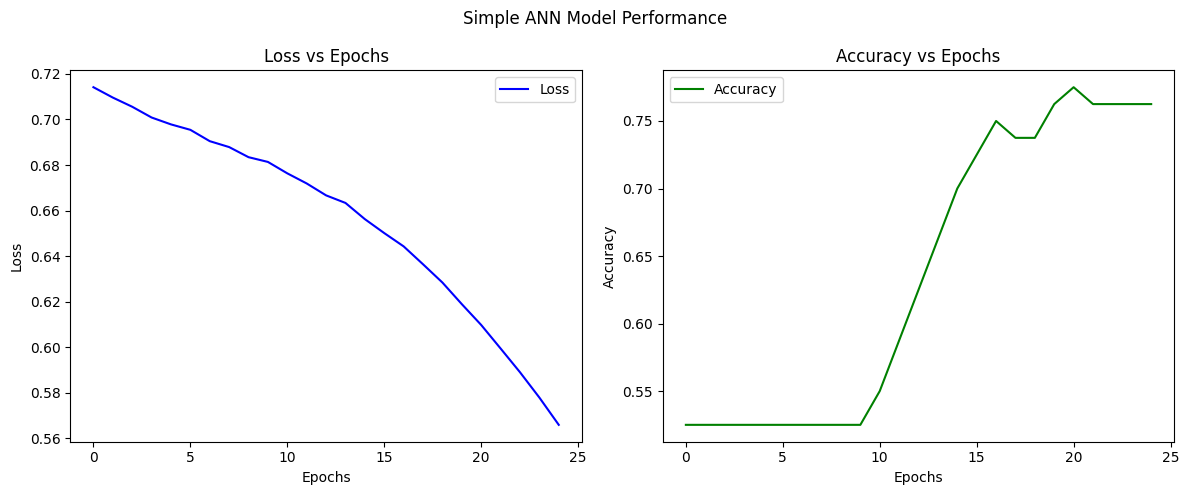

In [32]:
## for simple ANN model
ann_model = SimpleANN(len(vocab))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.001)
losses, accuracies = train_model(ann_model, train_loader, criterion, optimizer, num_epochs=25)
evaluate_model(ann_model, test_loader)
plot_results(losses, accuracies, title="Simple ANN Model Performance")

Epoch [1/25] 	 Loss: 0.7016 	 Accuracy: 0.4875
Epoch [2/25] 	 Loss: 0.6681 	 Accuracy: 0.6125
Epoch [3/25] 	 Loss: 0.5434 	 Accuracy: 0.8250
Epoch [4/25] 	 Loss: 0.1820 	 Accuracy: 0.9500
Epoch [5/25] 	 Loss: 0.0463 	 Accuracy: 0.9875
Epoch [6/25] 	 Loss: 0.0384 	 Accuracy: 0.9875
Epoch [7/25] 	 Loss: 0.0044 	 Accuracy: 1.0000
Epoch [8/25] 	 Loss: 0.0019 	 Accuracy: 1.0000
Epoch [9/25] 	 Loss: 0.0012 	 Accuracy: 1.0000
Epoch [10/25] 	 Loss: 0.0007 	 Accuracy: 1.0000
Epoch [11/25] 	 Loss: 0.0005 	 Accuracy: 1.0000
Epoch [12/25] 	 Loss: 0.0003 	 Accuracy: 1.0000
Epoch [13/25] 	 Loss: 0.0003 	 Accuracy: 1.0000
Epoch [14/25] 	 Loss: 0.0002 	 Accuracy: 1.0000
Epoch [15/25] 	 Loss: 0.0002 	 Accuracy: 1.0000
Epoch [16/25] 	 Loss: 0.0001 	 Accuracy: 1.0000
Epoch [17/25] 	 Loss: 0.0001 	 Accuracy: 1.0000
Epoch [18/25] 	 Loss: 0.0001 	 Accuracy: 1.0000
Epoch [19/25] 	 Loss: 0.0001 	 Accuracy: 1.0000
Epoch [20/25] 	 Loss: 0.0001 	 Accuracy: 1.0000
Epoch [21/25] 	 Loss: 0.0001 	 Accuracy: 1.0000
E

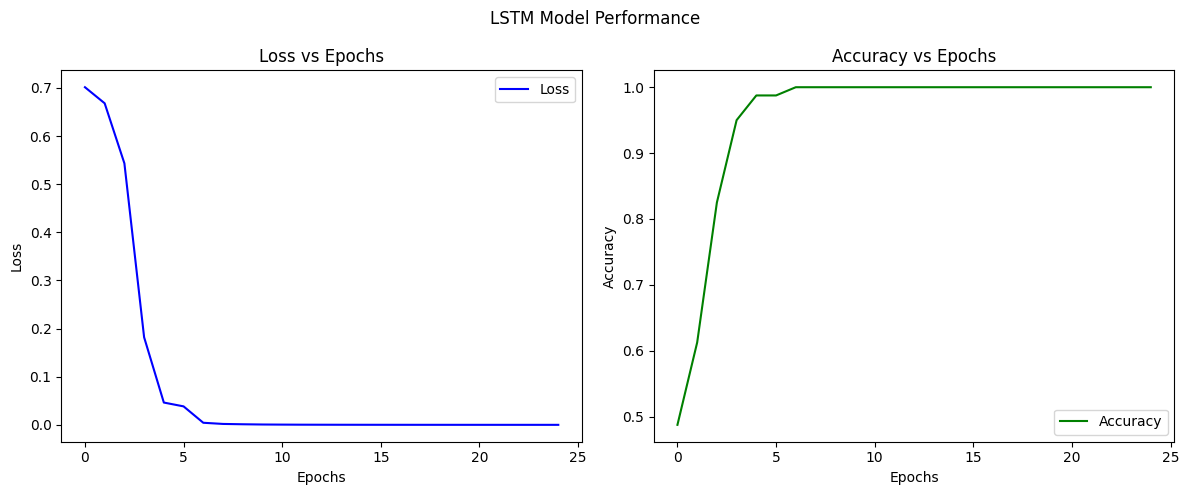

In [33]:
## For LSTM model
lstm_model = LSTM(len(vocab), max_len=10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
losses, accuracies = train_model(lstm_model, train_loader, criterion, optimizer, num_epochs=25)
evaluate_model(lstm_model, test_loader)
plot_results(losses, accuracies, title="LSTM Model Performance")    